# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting up the MDP

In [ ]:
states = [
    "Home Page", "Search Results", "(Product Page, Neutral)", "Reading Reviews",
    "Viewing 'Customers Also Bought'", "(Product Page, Positive)",
    "(Product Page, Negative)", "Added to Wishlist", "Added to Cart",
    "Checking Shipping Details", "At Checkout", "Purchase Complete", "Left Site"
]
s_map = {s: i for i, s in enumerate(states)}
num_states = len(states)

In [ ]:
actions = [
    "Do Nothing", "Show Personalized Banner", "Boost Sponsored Product",
    "Offer 10% Discount", "Show 'Low in Stock!' Alert", "Highlight 5-Star Review",
    "Inject High-Margin Item", "Send Sale Email", "Offer Free Shipping",
    "Offer Expedited Shipping Discount", "Show Trust Badges",
    "Collect Reward", "End Session"
]
a_map = {a: i for i, a in enumerate(actions)}
num_actions = len(actions)

In [ ]:
rewards = np.zeros((num_states, num_actions))

# Default "cost of time" for Do Nothing
rewards[:, a_map["Do Nothing"]] = -1

# Action costs
rewards[s_map["Home Page"], a_map["Show Personalized Banner"]] = -2
rewards[s_map["Search Results"], a_map["Boost Sponsored Product"]] = -2
rewards[s_map["(Product Page, Neutral)"], a_map["Offer 10% Discount"]] = -10
rewards[s_map["(Product Page, Neutral)"], a_map["Show 'Low in Stock!' Alert"]] = -2
rewards[s_map["(Product Page, Positive)"], a_map["Offer 10% Discount"]] = -10
rewards[s_map["(Product Page, Positive)"], a_map["Show 'Low in Stock!' Alert"]] = -2
rewards[s_map["(Product Page, Negative)"], a_map["Offer 10% Discount"]] = -10
rewards[s_map["(Product Page, Negative)"], a_map["Show 'Low in Stock!' Alert"]] = -2
rewards[s_map["Reading Reviews"], a_map["Highlight 5-Star Review"]] = -2
rewards[s_map["Viewing 'Customers Also Bought'"], a_map["Inject High-Margin Item"]] = -2
rewards[s_map["Added to Wishlist"], a_map["Send Sale Email"]] = -15
rewards[s_map["Added to Cart"], a_map["Offer Free Shipping"]] = -15
rewards[s_map["Added to Cart"], a_map["Offer 10% Discount"]] = -10
rewards[s_map["Checking Shipping Details"], a_map["Offer Expedited Shipping Discount"]] = -10
rewards[s_map["At Checkout"], a_map["Show Trust Badges"]] = -2

# Terminal state rewards
rewards[s_map["Purchase Complete"], a_map["Collect Reward"]] = 1000
rewards[s_map["Left Site"], a_map["End Session"]] = -100

In [ ]:
# --- 4. Transition Probabilities P(s' | s, a) ---
transitions = np.zeros((num_actions, num_states, num_states))
a_dn = a_map["Do Nothing"] # Index for "Do Nothing" action

# --- Baseline Probabilities (for 'Do Nothing' actions) ---
transitions[a_dn, s_map["Home Page"], s_map["Search Results"]] = 0.80
transitions[a_dn, s_map["Home Page"], s_map["Left Site"]] = 0.20

transitions[a_dn, s_map["Search Results"], s_map["(Product Page, Neutral)"]] = 0.60
transitions[a_dn, s_map["Search Results"], s_map["Search Results"]] = 0.25
transitions[a_dn, s_map["Search Results"], s_map["Home Page"]] = 0.05
transitions[a_dn, s_map["Search Results"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Reading Reviews"]] = 0.40
transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Added to Cart"]] = 0.15
transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Viewing 'Customers Also Bought'"]] = 0.15
transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Search Results"]] = 0.15
transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Added to Wishlist"]] = 0.10
transitions[a_dn, s_map["(Product Page, Neutral)"], s_map["Left Site"]] = 0.05

transitions[a_dn, s_map["Reading Reviews"], s_map["(Product Page, Positive)"]] = 0.50
transitions[a_dn, s_map["Reading Reviews"], s_map["(Product Page, Neutral)"]] = 0.20
transitions[a_dn, s_map["Reading Reviews"], s_map["(Product Page, Negative)"]] = 0.20
transitions[a_dn, s_map["Reading Reviews"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["Viewing 'Customers Also Bought'"], s_map["(Product Page, Neutral)"]] = 0.60
transitions[a_dn, s_map["Viewing 'Customers Also Bought'"], s_map["Search Results"]] = 0.20
transitions[a_dn, s_map["Viewing 'Customers Also Bought'"], s_map["Home Page"]] = 0.10
transitions[a_dn, s_map["Viewing 'Customers Also Bought'"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["(Product Page, Positive)"], s_map["Added to Cart"]] = 0.70
transitions[a_dn, s_map["(Product Page, Positive)"], s_map["Search Results"]] = 0.10
transitions[a_dn, s_map["(Product Page, Positive)"], s_map["Added to Wishlist"]] = 0.10
transitions[a_dn, s_map["(Product Page, Positive)"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["(Product Page, Negative)"], s_map["Search Results"]] = 0.70
transitions[a_dn, s_map["(Product Page, Negative)"], s_map["Left Site"]] = 0.25
transitions[a_dn, s_map["(Product Page, Negative)"], s_map["Home Page"]] = 0.05

transitions[a_dn, s_map["Added to Wishlist"], s_map["Left Site"]] = 0.60
transitions[a_dn, s_map["Added to Wishlist"], s_map["Search Results"]] = 0.20
transitions[a_dn, s_map["Added to Wishlist"], s_map["Home Page"]] = 0.20

transitions[a_dn, s_map["Added to Cart"], s_map["At Checkout"]] = 0.60
transitions[a_dn, s_map["Added to Cart"], s_map["Search Results"]] = 0.25
transitions[a_dn, s_map["Added to Cart"], s_map["Home Page"]] = 0.05
transitions[a_dn, s_map["Added to Cart"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["Checking Shipping Details"], s_map["At Checkout"]] = 0.80
transitions[a_dn, s_map["Checking Shipping Details"], s_map["Left Site"]] = 0.20

transitions[a_dn, s_map["At Checkout"], s_map["Purchase Complete"]] = 0.75
transitions[a_dn, s_map["At Checkout"], s_map["Checking Shipping Details"]] = 0.10
transitions[a_dn, s_map["At Checkout"], s_map["Added to Cart"]] = 0.05
transitions[a_dn, s_map["At Checkout"], s_map["Left Site"]] = 0.10

transitions[a_dn, s_map["Purchase Complete"], s_map["Purchase Complete"]] = 1.0
transitions[a_dn, s_map["Left Site"], s_map["Left Site"]] = 1.0

# --- Action-Modified Probabilities ---
# Home Page
a = a_map["Show Personalized Banner"]
s = s_map["Home Page"]
transitions[a, s, s_map["Search Results"]] = 0.85
transitions[a, s, s_map["Left Site"]] = 0.15

# Search Results
a = a_map["Boost Sponsored Product"]
s = s_map["Search Results"]
transitions[a, s, s_map["(Product Page, Neutral)"]] = 0.70
transitions[a, s, s_map["Search Results"]] = 0.20
transitions[a, s, s_map["Left Site"]] = 0.05
transitions[a, s, s_map["Home Page"]] = 0.05

s = s_map["(Product Page, Neutral)"]
a = a_map["Offer 10% Discount"]
transitions[a, s, s_map["Added to Cart"]] = 0.45
transitions[a, s, s_map["Reading Reviews"]] = 0.20
transitions[a, s, s_map["Viewing 'Customers Also Bought'"]] = 0.15
transitions[a, s, s_map["Added to Wishlist"]] = 0.10
transitions[a, s, s_map["Search Results"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05

a = a_map["Show 'Low in Stock!' Alert"]
transitions[a, s, s_map["Added to Cart"]] = 0.35
transitions[a, s, s_map["Added to Wishlist"]] = 0.15
transitions[a, s, s_map["Reading Reviews"]] = 0.30
transitions[a, s, s_map["Viewing 'Customers Also Bought'"]] = 0.10
transitions[a, s, s_map["Search Results"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05

# Reading Reviews
a = a_map["Highlight 5-Star Review"]
s = s_map["Reading Reviews"]
transitions[a, s, s_map["(Product Page, Positive)"]] = 0.65
transitions[a, s, s_map["(Product Page, Neutral)"]] = 0.15
transitions[a, s, s_map["(Product Page, Negative)"]] = 0.10
transitions[a, s, s_map["Left Site"]] = 0.10

# Viewing 'Customers Also Bought'
a = a_map["Inject High-Margin Item"]
s = s_map["Viewing 'Customers Also Bought'"]
transitions[a, s, s_map["(Product Page, Neutral)"]] = 0.75
transitions[a, s, s_map["Search Results"]] = 0.15
transitions[a, s, s_map["Home Page"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05

# (Product Page, Positive)
s = s_map["(Product Page, Positive)"]
a = a_map["Offer 10% Discount"]
transitions[a, s, s_map["Added to Cart"]] = 0.80
transitions[a, s, s_map["Added to Wishlist"]] = 0.10
transitions[a, s, s_map["Search Results"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05
a = a_map["Show 'Low in Stock!' Alert"]
transitions[a, s, s_map["Added to Cart"]] = 0.75
transitions[a, s, s_map["Added to Wishlist"]] = 0.15
transitions[a, s, s_map["Search Results"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05


# (Product Page, Negative)
s = s_map["(Product Page, Negative)"]
a = a_map["Offer 10% Discount"]
transitions[a, s, s_map["Search Results"]] = 0.50
transitions[a, s, s_map["Added to Cart"]] = 0.25
transitions[a, s, s_map["Left Site"]] = 0.20
transitions[a, s, s_map["Home Page"]] = 0.05
a = a_map["Show 'Low in Stock!' Alert"]
transitions[a, s, s_map["Search Results"]] = 0.60
transitions[a, s, s_map["Added to Cart"]] = 0.15
transitions[a, s, s_map["Left Site"]] = 0.20
transitions[a, s, s_map["Home Page"]] = 0.05

# Added to Wishlist
s = s_map["Added to Wishlist"]
a = a_map["Send Sale Email"]
transitions[a, s, s_map["(Product Page, Neutral)"]] = 0.15
transitions[a, s, s_map["Left Site"]] = 0.45
transitions[a, s, s_map["Search Results"]] = 0.20
transitions[a, s, s_map["Home Page"]] = 0.20

# Added to Cart
s = s_map["Added to Cart"]
a = a_map["Offer Free Shipping"]
transitions[a, s, s_map["At Checkout"]] = 0.80
transitions[a, s, s_map["Search Results"]] = 0.10
transitions[a, s, s_map["Home Page"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05
a = a_map["Offer 10% Discount"]
transitions[a, s, s_map["At Checkout"]] = 0.90
transitions[a, s, s_map["Search Results"]] = 0.05
transitions[a, s, s_map["Left Site"]] = 0.05
transitions[a, s, s_map["Home Page"]] = 0.00

# Checking Shipping Details
s = s_map["Checking Shipping Details"]
a = a_map["Offer Expedited Shipping Discount"]
transitions[a, s, s_map["At Checkout"]] = 0.90
transitions[a, s, s_map["Left Site"]] = 0.10

# At Checkout
s = s_map["At Checkout"]
a = a_map["Show Trust Badges"]
transitions[a, s, s_map["Purchase Complete"]] = 0.80
transitions[a, s, s_map["Left Site"]] = 0.05
transitions[a, s, s_map["Checking Shipping Details"]] = 0.10
transitions[a, s, s_map["Added to Cart"]] = 0.05

# --- Absorbing State Transitions ---
s_purchased = s_map["Purchase Complete"]
a_reward = a_map["Collect Reward"]
transitions[a_reward, s_purchased, s_purchased] = 1.0

s_left = s_map["Left Site"]
a_end = a_map["End Session"]
transitions[a_end, s_left, s_left] = 1.0

print("Full MDP setup is complete and loaded into memory.")

Full MDP setup is complete and loaded into memory.


# Value Iteration

In [ ]:
def value_iteration_with_tracking(transitions, rewards, gamma=0.99, theta=1e-9):
    """
    Performs value iteration and tracks extra data for plotting convergence.
    """
    num_states = transitions.shape[1]
    num_actions = transitions.shape[0]
    
    V = np.zeros(num_states)

    V[s_map["Purchase Complete"]] = 1000
    V[s_map["Left Site"]] = -100
    
    # --- Data for plotting ---
    deltas = []
    homepage_values = []
    policy_changes = []
    
    # Initialize a policy to compare against
    last_policy = np.zeros(num_states, dtype=int)

    while True:
        delta = 0
        v_old_iteration = V.copy() # Use .copy() to ensure it's a separate object
        
        # --- Main Bellman Update Loop ---
        for s in range(num_states):

            if s in [s_map["Purchase Complete"], s_map["Left Site"]]:
                continue

            # Store the state's previous value for delta calculation
            v_old_state = V[s]
            
            # Calculate the value of taking each available action from the current state s
            action_values = np.zeros(num_actions)
            for a in range(num_actions):
                # E[R(s,a)] + gamma * sum( P(s'|s,a) * V_old(s') )
                action_values[a] = rewards[s, a] + gamma * np.dot(transitions[a, s, :], v_old_iteration)
            
            # The new value of the state is the max over all possible action values
            V[s] = np.max(action_values)
            
            # Update the max change for this iteration
            delta = max(delta, np.abs(v_old_state - V[s]))
        
        # --- Track data for plots ---
        deltas.append(delta)
        homepage_values.append(V[s_map["Home Page"]])
        
        # --- Track policy changes ---
        current_policy = extract_policy(V, transitions, rewards, gamma)
        changes = np.sum(current_policy != last_policy)
        policy_changes.append(changes)
        last_policy = current_policy
        
        # --- Check for convergence ---
        if delta < theta:
            break
            
    return V, deltas, homepage_values, policy_changes

def extract_policy(V, transitions, rewards, gamma=0.99):
    """
    Extracts the optimal policy from the optimal value function.

    Args:
        V (np.array): The optimal value function.
        (Same other args as value_iteration)

    Returns:
        policy (np.array): An array where policy[s] is the index of the best action in state s.
    """
    num_states = transitions.shape[1]
    num_actions = transitions.shape[0]
    policy = np.zeros(num_states, dtype=int)

    for s in range(num_states):
        action_values = np.zeros(num_actions)
        for a in range(num_actions):
            action_values[a] = rewards[s, a] + gamma * np.dot(transitions[a, s, :], V)
        
        # The best action is the one that maximizes the action_value
        policy[s] = np.argmax(action_values)
        
    return policy

print("Running Value Iteration with tracking...")
optimal_V, deltas, homepage_values, policy_changes = value_iteration_with_tracking(transitions, rewards)
print("Convergence tracking complete!")

print("\nExtracting Optimal Policy...")
optimal_policy_indices = extract_policy(optimal_V, transitions, rewards)
print("Optimal Policy Extracted!")

# --- Displaying the Results ---
print("\n--- Optimal Policy ---")
for i, state in enumerate(states):
    # We don't care about the policy for absorbing states
    if state in ["Purchase Complete", "Left Site"]:
        continue
    action_index = optimal_policy_indices[i]
    print(f"In state '{state}', the best action is: '{actions[action_index]}'")

Running Value Iteration with tracking...
Convergence tracking complete!

Extracting Optimal Policy...
Optimal Policy Extracted!

--- Optimal Policy ---
In state 'Home Page', the best action is: 'Show Personalized Banner'
In state 'Search Results', the best action is: 'Boost Sponsored Product'
In state '(Product Page, Neutral)', the best action is: 'Offer 10% Discount'
In state 'Reading Reviews', the best action is: 'Highlight 5-Star Review'
In state 'Viewing 'Customers Also Bought'', the best action is: 'Inject High-Margin Item'
In state '(Product Page, Positive)', the best action is: 'Offer 10% Discount'
In state '(Product Page, Negative)', the best action is: 'Offer 10% Discount'
In state 'Added to Wishlist', the best action is: 'Send Sale Email'
In state 'Added to Cart', the best action is: 'Offer 10% Discount'
In state 'Checking Shipping Details', the best action is: 'Offer Expedited Shipping Discount'
In state 'At Checkout', the best action is: 'Show Trust Badges'


## Plotting convergence

### Delta Plot

Convergence plot has been generated and saved as 'value_iteration_convergence.png'


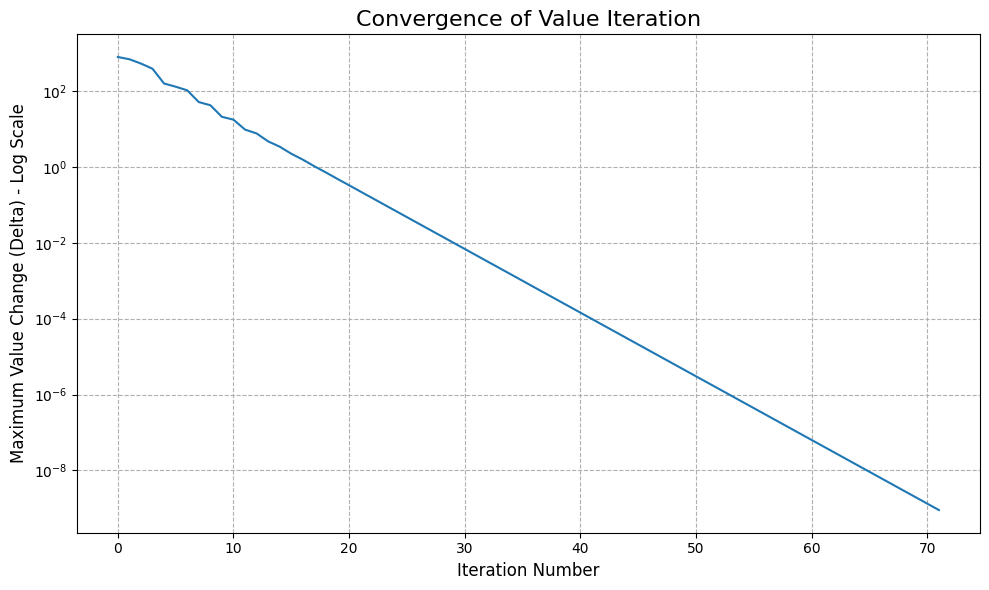

In [ ]:
# --- Plotting the Convergence ---
plt.figure(figsize=(10, 6))

# Create the line plot
plt.plot(deltas)

# Use a logarithmic scale for the y-axis to better visualize the exponential decay of the error
plt.yscale('log')

# Add labels and a title for clarity
plt.title('Convergence of Value Iteration', fontsize=16)
plt.xlabel('Iteration Number', fontsize=12)
plt.ylabel('Maximum Value Change (Delta) - Log Scale', fontsize=12)
plt.grid(True, which="both", ls="--") # Add a grid for easier reading
plt.tight_layout()

plt.savefig('Value_Iteration/value_iteration_convergence.png')

print("Convergence plot has been generated and saved as 'value_iteration_convergence.png'")

### Value of the Home Page state

State value convergence plot saved as 'state_value_convergence.png'
421.8449564400707


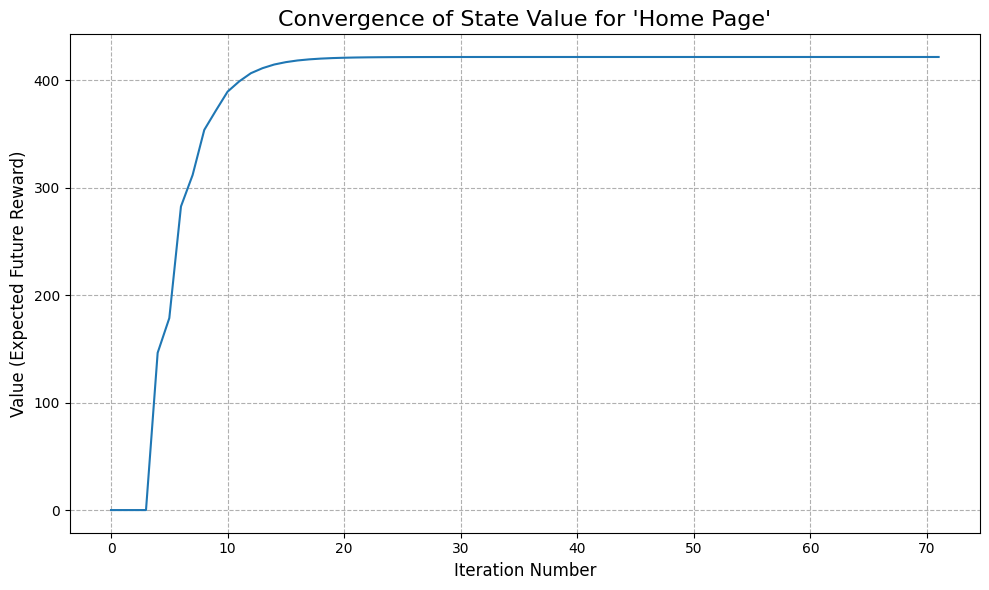

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(homepage_values)
plt.title("Convergence of State Value for 'Home Page'", fontsize=16)
plt.xlabel("Iteration Number", fontsize=12)
plt.ylabel("Value (Expected Future Reward)", fontsize=12)
plt.grid(True, ls="--")
plt.tight_layout()
plt.savefig('Value_Iteration/state_value_convergence.png')

print("State value convergence plot saved as 'state_value_convergence.png'")

print(homepage_values[-1])

### Policy Stability

Policy stability plot saved as 'policy_stability_convergence.png'


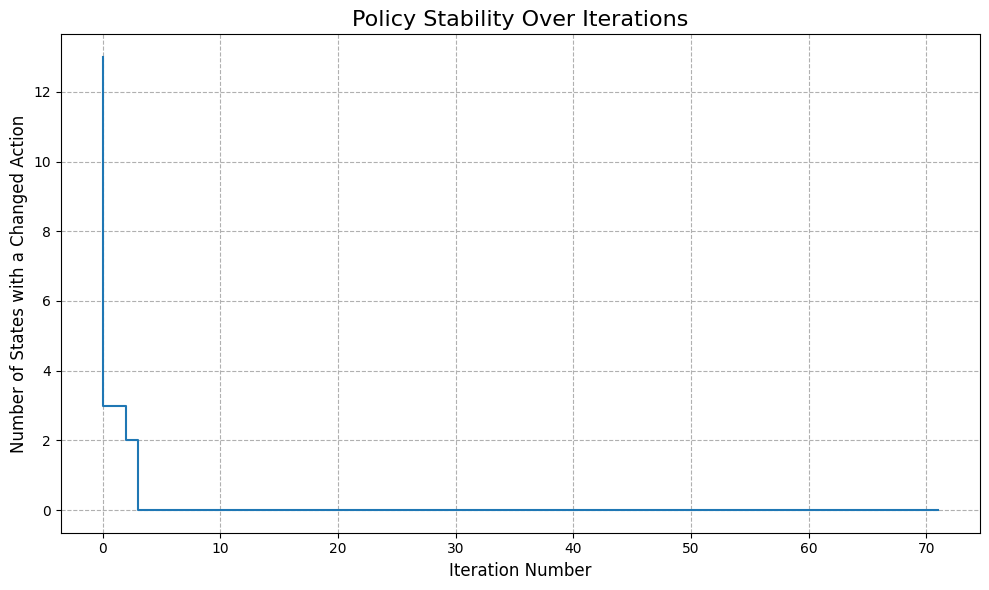

In [ ]:
plt.figure(figsize=(10, 6))
plt.step(range(len(policy_changes)), policy_changes)
plt.title("Policy Stability Over Iterations", fontsize=16)
plt.xlabel("Iteration Number", fontsize=12)
plt.ylabel("Number of States with a Changed Action", fontsize=12)
plt.grid(True, ls="--")
plt.tight_layout()
plt.savefig('Value_Iteration/policy_stability_convergence.png')

print("Policy stability plot saved as 'policy_stability_convergence.png'")

# Q-Learning

In [ ]:
valid_actions = {}
for i in range(num_states):
    valid_actions[i] = [] # Initialize with empty lists

# Populate with valid actions for each state
valid_actions[s_map["Home Page"]] = [a_map["Do Nothing"], a_map["Show Personalized Banner"]]
valid_actions[s_map["Search Results"]] = [a_map["Do Nothing"], a_map["Boost Sponsored Product"]]
for state_name in ["(Product Page, Neutral)", "(Product Page, Positive)", "(Product Page, Negative)"]:
    s_idx = s_map[state_name]
    valid_actions[s_idx] = [a_map["Do Nothing"], a_map["Offer 10% Discount"], a_map["Show 'Low in Stock!' Alert"]]
valid_actions[s_map["Reading Reviews"]] = [a_map["Do Nothing"], a_map["Highlight 5-Star Review"]]
valid_actions[s_map["Viewing 'Customers Also Bought'"]] = [a_map["Do Nothing"], a_map["Inject High-Margin Item"]]
valid_actions[s_map["Added to Wishlist"]] = [a_map["Do Nothing"], a_map["Send Sale Email"]]
valid_actions[s_map["Added to Cart"]] = [a_map["Do Nothing"], a_map["Offer Free Shipping"], a_map["Offer 10% Discount"]]
valid_actions[s_map["Checking Shipping Details"]] = [a_map["Do Nothing"], a_map["Offer Expedited Shipping Discount"]]
valid_actions[s_map["At Checkout"]] = [a_map["Do Nothing"], a_map["Show Trust Badges"]]
valid_actions[s_map["Purchase Complete"]] = [a_map["Collect Reward"]]
valid_actions[s_map["Left Site"]] = [a_map["End Session"]]

In [ ]:
S, A = len(states), len(actions)
PURCHASE, LEFT = s_map["Purchase Complete"], s_map["Left Site"]
TERMINALS = {PURCHASE, LEFT}

def nonterminal_states():
    return [s for s in range(S) if s not in TERMINALS]

def build_feasible_actions(transitions, atol=1e-12):
    feas = {s: [] for s in range(S)}
    for s in range(S):
        for a in range(A):
            if np.isclose(transitions[a, s].sum(), 1.0, atol=atol):
                feas[s].append(a)
    return feas

ACTIONS_BY_STATE = build_feasible_actions(transitions)

def set_seeds(seed=0):
    np.random.seed(seed); random.seed(seed)
set_seeds(0)

def greedy_policy_from_Q(Q):
    """Greedy policy over feasible actions; terminals skipped."""
    pi = np.zeros(S, dtype=int)
    for s in range(S):
        if s in TERMINALS or not ACTIONS_BY_STATE[s]:
            continue
        acts = ACTIONS_BY_STATE[s]
        pi[s] = acts[np.argmax(Q[s, acts])]
    return pi

def q_learning(
    episodes=300_000,
    gamma=0.99,
    eps0=1.0,
    eps_min=0.001,
    alpha_beta=0.65,         
    p_exploring_start=0.5,
    max_steps=3000,
    log_every=1000,
    seed=0
):
    set_seeds(seed)
    Q = np.zeros((S, A), dtype=float)
    N = np.zeros((S, A), dtype=int)

    logs = {
        "episode": [],
        "epsilon": [],
        "ep_return": [],
        "max_q_delta": [],
        "policy_changes": [],
        "homepage_qmax": [],
    }

    last_logged_policy = greedy_policy_from_Q(Q)

    def terminal_value(s_next):
        return 1000.0 if s_next == PURCHASE else -100.0

    for ep in range(1, episodes + 1):
        eps = max(eps_min, eps0 / np.sqrt(1 + ep))

        if random.random() < p_exploring_start:
            s = random.choice(nonterminal_states())
        else:
            s = s_map["Home Page"]

        G = 0.0
        max_delta = 0.0

        for _ in range(max_steps):
            acts = ACTIONS_BY_STATE[s]
            if not acts:
                break

            if random.random() < eps:
                a = random.choice(acts)
            else:
                qv = Q[s, acts]
                a = acts[np.random.choice(np.flatnonzero(qv == qv.max()))]

            # Sample next state
            p = transitions[a, s]
            s_next = np.random.choice(S, p=p)

            r = rewards[s, a]

            N[s, a] += 1
            alpha = 1.0 / (N[s, a] ** alpha_beta)

            # Target
            if s_next in TERMINALS:
                target = r + gamma * terminal_value(s_next)
            else:
                nxt = ACTIONS_BY_STATE[s_next]
                target = r + gamma * (Q[s_next, nxt].max() if nxt else 0.0)

            old_q = Q[s, a]
            Q[s, a] += alpha * (target - old_q)
            max_delta = max(max_delta, abs(Q[s, a] - old_q))

            G += r
            s = s_next
            if s in TERMINALS:
                break

        # Logging
        if ep % log_every == 0:
            pi_now = greedy_policy_from_Q(Q)
            changes = int(np.sum(pi_now != last_logged_policy))
            last_logged_policy = pi_now

            logs["episode"].append(ep)
            logs["epsilon"].append(eps)
            logs["ep_return"].append(G)
            logs["max_q_delta"].append(max_delta)
            hp = s_map["Home Page"]
            logs["homepage_qmax"].append(np.max(Q[hp, ACTIONS_BY_STATE[hp]]))

    return Q, logs

Q_optimal, logs = q_learning(
    episodes=500_000,  
    alpha_beta=0.65,     
    seed=0,       
    log_every=1000
)
print("GLIE Q-learning finished.")

print("\n--- Greedy Policy from GLIE Q-learning ---")
for s, name in enumerate(states):
    if s in TERMINALS:
        continue
    acts = ACTIONS_BY_STATE[s]
    best_a = acts[np.argmax(Q_optimal[s, acts])] if acts else None
    print(f"In state '{name}', take action: '{actions[best_a]}'")

GLIE Q-learning finished.

--- Greedy Policy from GLIE Q-learning ---
In state 'Home Page', take action: 'Show Personalized Banner'
In state 'Search Results', take action: 'Boost Sponsored Product'
In state '(Product Page, Neutral)', take action: 'Offer 10% Discount'
In state 'Reading Reviews', take action: 'Highlight 5-Star Review'
In state 'Viewing 'Customers Also Bought'', take action: 'Inject High-Margin Item'
In state '(Product Page, Positive)', take action: 'Offer 10% Discount'
In state '(Product Page, Negative)', take action: 'Offer 10% Discount'
In state 'Added to Wishlist', take action: 'Send Sale Email'
In state 'Added to Cart', take action: 'Offer 10% Discount'
In state 'Checking Shipping Details', take action: 'Offer Expedited Shipping Discount'
In state 'At Checkout', take action: 'Show Trust Badges'


## Plotting Convergence

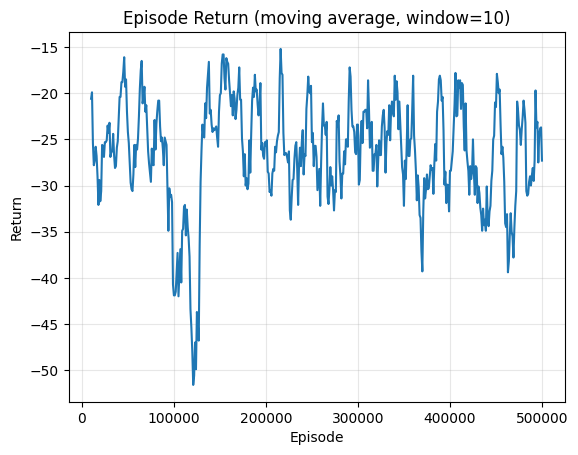

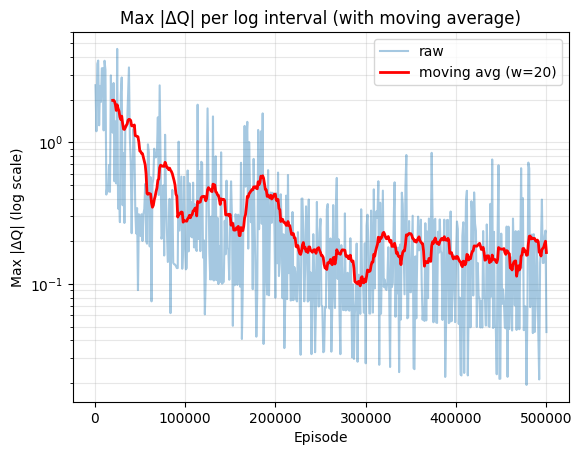

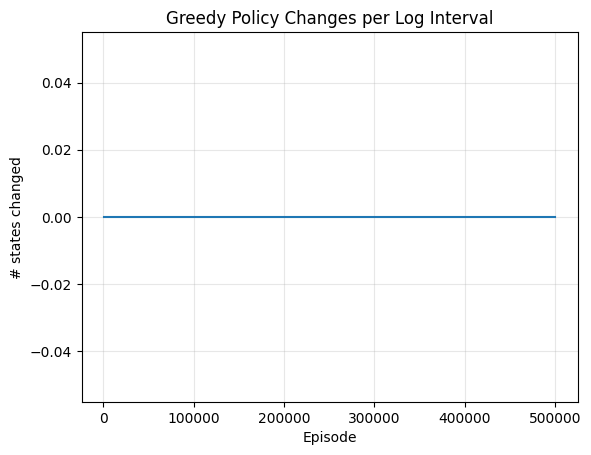

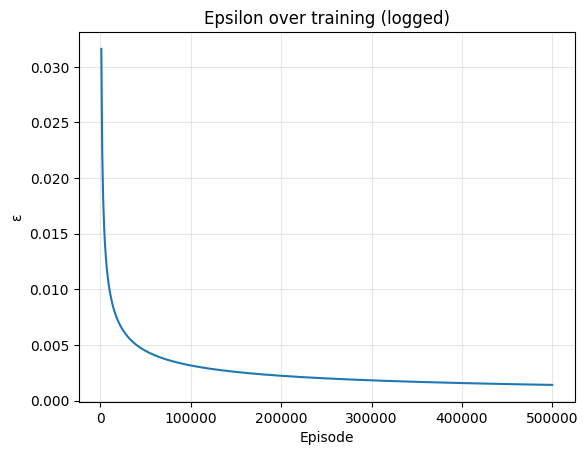

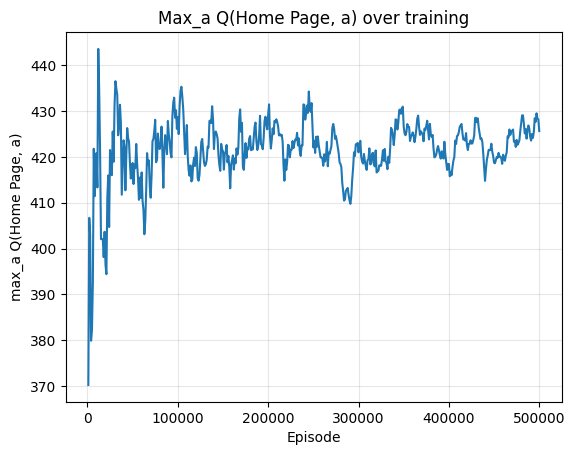

In [ ]:
def moving_avg(x, w):
    x = np.asarray(x, dtype=float)
    if len(x) < w: return x
    return np.convolve(x, np.ones(w)/w, mode="valid")

# 1) Episode Return (moving average over logged points)
plt.figure()
ma = moving_avg(logs["ep_return"], 10)
x = logs["episode"][len(logs["episode"]) - len(ma):]
plt.plot(x, ma)
plt.title("Episode Return (moving average, window=10)")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.grid(True, alpha=0.3)
plt.savefig('Q_Learning/episode_return.png')
plt.show()

# 2) Max |ΔQ| per log interval (log scale)
plt.figure()
window = 20 
y = np.array(logs["max_q_delta"], dtype=float)
x = np.array(logs["episode"], dtype=int)

def moving_avg(x, w):
    if len(x) < w: 
        return x
    return np.convolve(x, np.ones(w)/w, mode="valid")

y_ma = moving_avg(y, window)
x_ma = x[len(x) - len(y_ma):]

plt.plot(x, y, alpha=0.4, label="raw")
plt.plot(x_ma, y_ma, color="red", linewidth=2, label=f"moving avg (w={window})")

plt.yscale("log")
plt.title("Max |ΔQ| per log interval (with moving average)")
plt.xlabel("Episode")
plt.ylabel("Max |ΔQ| (log scale)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.savefig('Q_Learning/max_q_delta.png')
plt.show()

# 3) Greedy policy stability (number of states that changed since last log)
plt.figure()
if "policy_changes" in logs and len(logs["policy_changes"]) == len(logs["episode"]):
    plt.plot(logs["episode"], logs["policy_changes"])
else:
    plt.plot(logs["episode"], np.zeros_like(logs["episode"]))
plt.title("Greedy Policy Changes per Log Interval")
plt.xlabel("Episode")
plt.ylabel("# states changed")
plt.grid(True, alpha=0.3)
plt.savefig('Q_Learning/policy_changes.png')
plt.show()

# 4) Epsilon over time (logged)
plt.figure()
plt.plot(logs["episode"], logs["epsilon"])
plt.title("Epsilon over training (logged)")
plt.xlabel("Episode")
plt.ylabel("ε")
plt.grid(True, alpha=0.3)
plt.savefig('Q_Learning/epsilon_over_time.png')
plt.show()

# 5) Q(Home Page) max over time
plt.figure()
plt.plot(logs["episode"], logs["homepage_qmax"])
plt.title("Max_a Q(Home Page, a) over training")
plt.xlabel("Episode")
plt.ylabel("max_a Q(Home Page, a)")
plt.grid(True, alpha=0.3)
plt.savefig('Q_Learning/homepage_qmax.png')
plt.show()